In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:
dataset, dataset_info = tfds.load('malaria', split= 'train', as_supervised= True, with_info= True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=10000.0 (msgs/sec)
NotebookApp.rate_limit_window=1.0 (secs)



Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/incomplete.HKZUD3_1.0.0/malaria-train.tfrecord*...:   0%|         …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
next(dataset.as_numpy_iterator())

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 1)

In [4]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpl2ng0ovgtfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


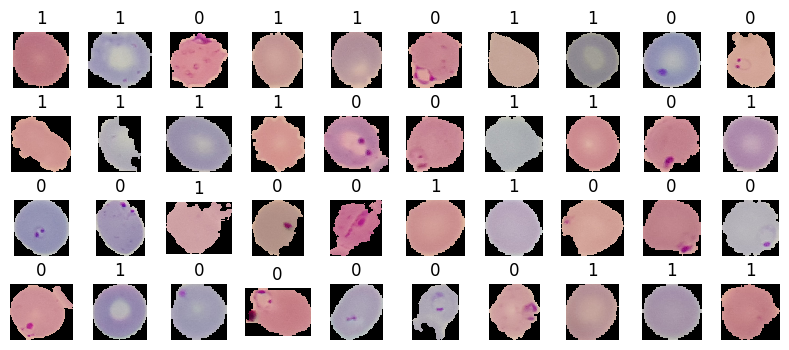

In [5]:
n_rows = 4
n_cols = 10
plt.figure(figsize= (n_cols, n_rows))

np_iterator = dataset.as_numpy_iterator()

for row in range(n_rows):
    for col in range(n_cols):
        data = next(np_iterator)
        index = n_cols * row + col + 1
        plt.subplot(n_rows, n_cols, index)
        plt.imshow(data[0], cmap= 'binary', interpolation= 'nearest')
        plt.axis('off')
        plt.title(data[1])
        
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Data Augmentation using tf.image

In [6]:
original_image = next(np_iterator)[0]

In [7]:
def visualize(original: tf.Tensor, augmented: tf.Tensor) -> None:
    plt.subplot(121)
    plt.imshow(original)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(augmented)
    plt.title('Augmented')
    plt.axis('off')

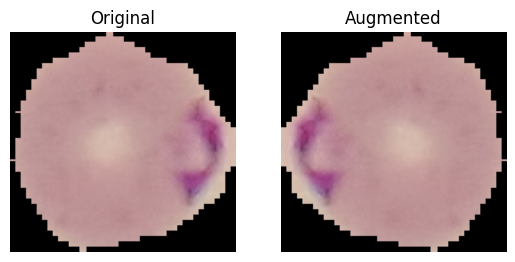

In [8]:
augmented_image = tf.image.flip_left_right(original_image)

visualize(original_image, augmented_image)

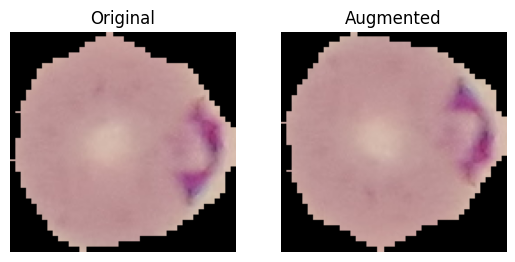

In [9]:
augmented_image = tf.image.random_flip_up_down(original_image)

visualize(original_image, augmented_image)

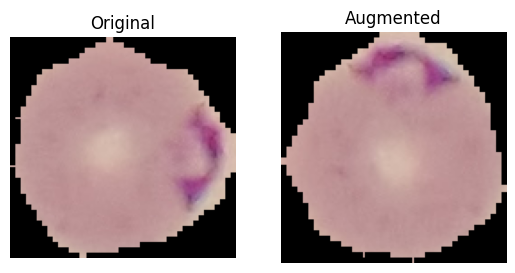

In [10]:
augmented_image = tf.image.rot90(original_image)

visualize(original_image, augmented_image)

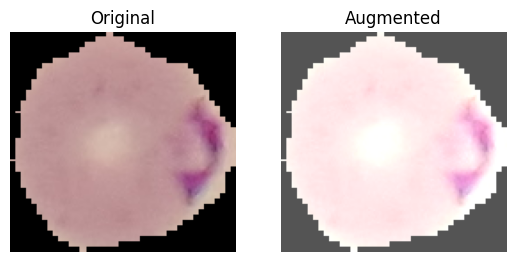

In [11]:
augmented_image = tf.image.random_brightness(original_image, max_delta= 0.5)

visualize(original_image, augmented_image)

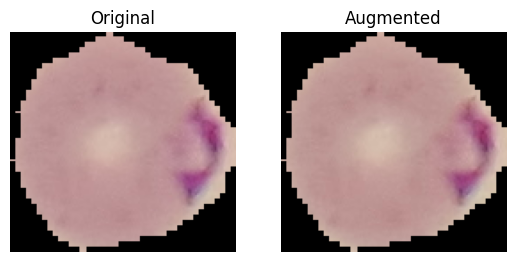

In [12]:
augmented_image = tf.image.random_hue(original_image, max_delta= 0.2)

visualize(original_image, augmented_image)

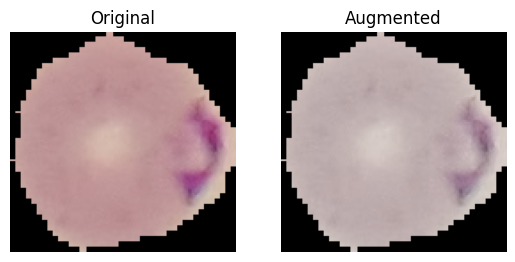

In [33]:
augmented_image = tf.image.adjust_saturation(original_image, saturation_factor= 0.4)

visualize(original_image, augmented_image)

Sometimes saturation may lead to such images that are indifferentiable like in the above case. This makes it difficult to classifiy. Same goes for others as well because they might change the image too much or make different kind of images very similar, so we've to select a proper range that doesn't change then entirely.

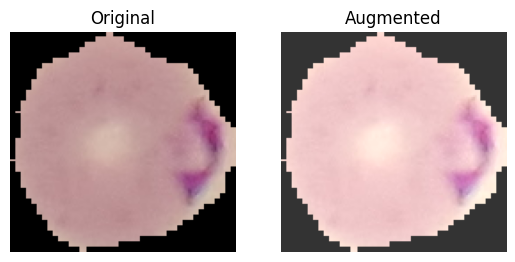

In [30]:
augmented_image = tf.image.adjust_brightness(original_image, delta= 0.2)

visualize(original_image, augmented_image)

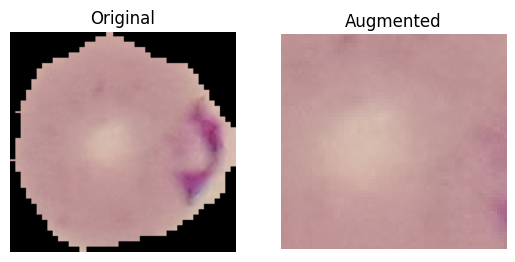

In [15]:
augmented_image = tf.image.central_crop(original_image, central_fraction= 0.5)    # 50% of image

visualize(original_image, augmented_image)

## Data Augmentation using Keras

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.RandomBrightness(factor= 0.2),
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation(factor= (-0.2, 0.3)),
    #[...]
])